In [1]:
from IPython.core.display import display, HTML
display(HTML('<style>.container {width:100% !important;}</style>'))

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt 
import numpy as np
from itertools import product

from theory.transform import matrix_from_formula, remove_variables
from theory.fact_of_transform import create_factorisation_var_gadgets
from theory.represent import from_rank_1_list_to_WH

from visualisation.visual import InteractiveFactorPlot

In [2]:
formula = "x * y + 2 * z + 2 *  z - 3 * u * v *  t - 4 * z - 5 * u * x + 1"
solution = dict(
    x=0.5,
    y=0.6,
    z=0.5,
    v=0.5,
    u=0.4,
    t=0.5
)

In [3]:
n_mat, v_mat, expected_rank_with_variables, fact_data = matrix_from_formula(formula)
n_mat_removed, v_mat_removed, exp_rank, g1_idx_by_var = remove_variables(n_mat, v_mat,
                                                              fact_data["ranges"],
                                                              expected_rank_with_variables)

terms = create_factorisation_var_gadgets(n_mat_removed, g1_idx_by_var, solution, fact_data)
W, H = from_rank_1_list_to_WH(terms)

remove_variable u
remove_variable x
remove_variable _v_2_1
remove_variable t
remove_variable _v_3_1
remove_variable v
remove_variable _v_3_2
remove_variable _L
remove_variable y
remove_variable _v_1_1


<IPython.core.display.Javascript object>


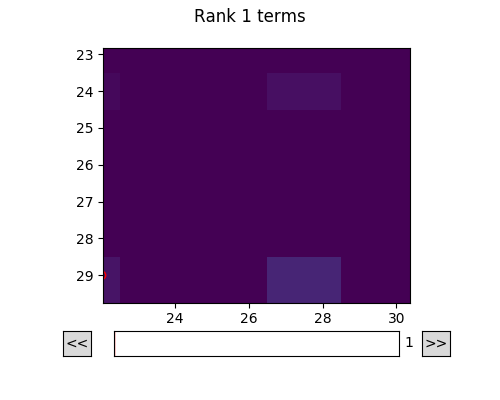

<IPython.core.display.Javascript object>


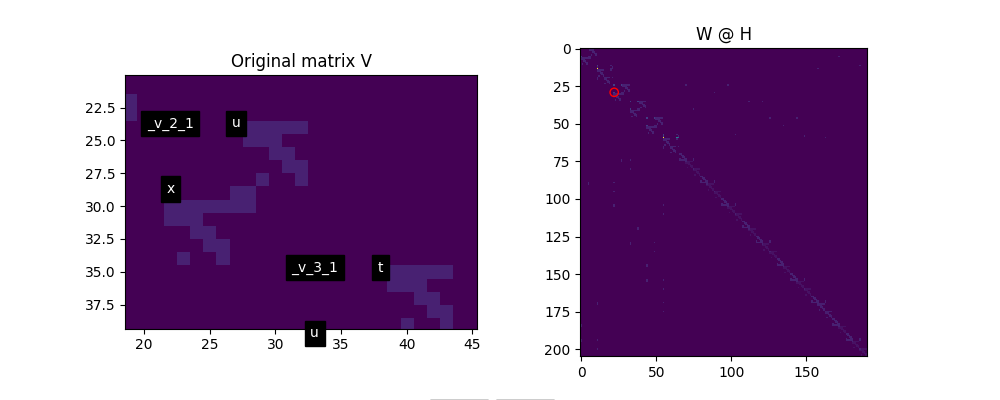

In [5]:
plot = InteractiveFactorPlot(W, H, n_mat_removed)

for i, j in product(range(v_mat_removed.shape[0]), range(v_mat_removed.shape[1])):
    if v_mat_removed[i, j] == "":
        continue
        
    plot.ori_ax.text(j, i, v_mat_removed[i, j], color="white",
             backgroundcolor="black",
             horizontalalignment="center")

In [7]:
s_idxs = fact_data["positive"]["s"]["idxs"] + fact_data["negative"]["s"]["idxs"] 
s_expanded_vars = fact_data["positive"]["s"]["expanded_vars"] + fact_data["negative"]["s"]["expanded_vars"] 

In [8]:
mask = np.full(n_mat_removed.shape, False, dtype=bool)

idx, expanded_vars = s_idxs[0], s_expanded_vars[0]
mask[:, :] = False
mask[idx] = True

terms_array = np.array(terms)
terms_i = [i for i in range(len(terms)) if np.any(terms[i][mask] > 0) and np.all(terms[i][~mask] == 0)]

<IPython.core.display.Javascript object>


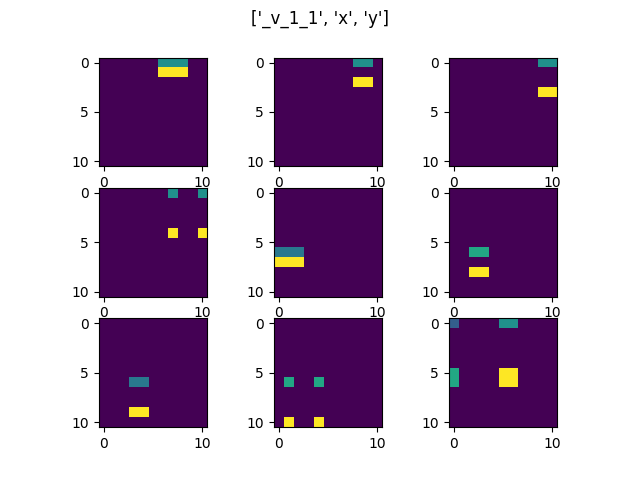

In [10]:
f, axs = plt.subplots(3, 3)
f.suptitle("{}".format(expanded_vars))

axs = axs.ravel()
for ax, i in zip(axs, terms_i):
    ax.imshow(terms[i][idx]) 

In [13]:
p_idxs = [fact_data["positive"]["p"]["idx"], fact_data["negative"]["p"]["idx"]]
p_vars = [fact_data["positive"]["p"]["vars"], fact_data["negative"]["p"]["vars"]]

In [24]:
mask_p = np.full(n_mat_removed.shape, False, dtype=bool)

idx, vars_ = p_idxs[0], p_vars[0]
mask_p[:, :] = False
mask_p[idx] = True

terms_array = np.array(terms)
terms_i = [i for i in range(len(terms)) if np.any(terms[i][mask_p] > 0) and np.all(terms[i][~mask_p] == 0)]

<IPython.core.display.Javascript object>


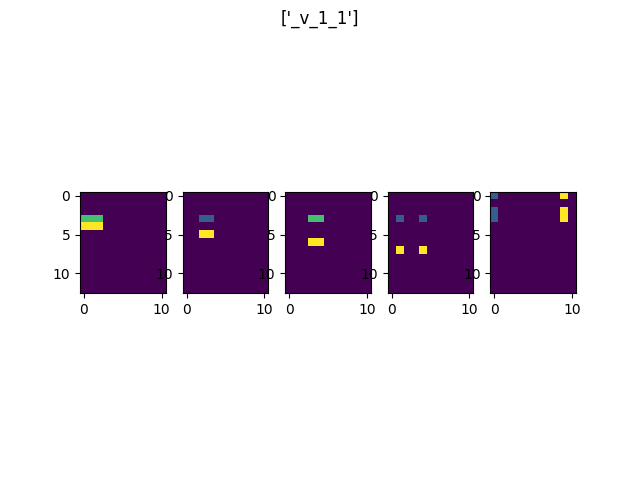

In [25]:
f, axs = plt.subplots(len(vars_), 5)
f.suptitle("{}".format(vars_))

axs = axs.ravel()
for ax, i in zip(axs, terms_i):
    ax.imshow(terms[i][idx]) 

In [39]:
s = np.sum([terms[i][idx] for i in terms_i], axis=0)

<IPython.core.display.Javascript object>


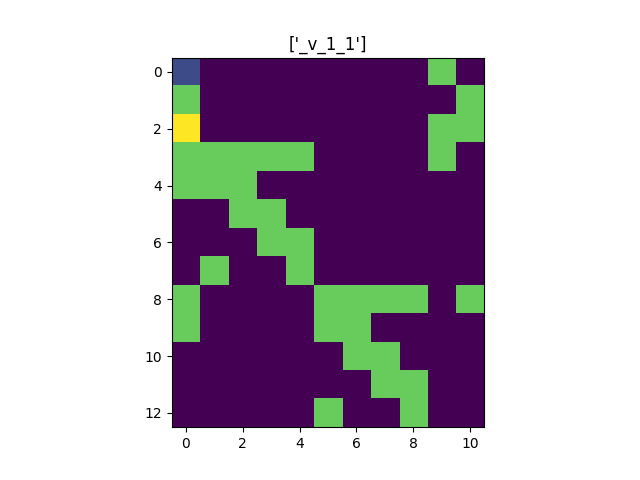

Text(0.5, 1.0, "['_v_1_1']")

In [44]:
plt.imshow(s)
plt.gca().set_title("{}".format(vars_))